In [32]:
#importing/downloading relevant packages/modules
#downloading esda to use the esda.Moran_Local_BV class
try:
    import esda
except:
    %pip install esda
#geopandas to download and read the shapefile
import geopandas as gpd
#geodatasets and matplotlib packages for the processing of the plotter module -- 
# -- a unified mapping module that was created to maintain consistent formatting of the maps 
%pip install geodatasets
import matplotlib
%pip install matplotlib-scalebar
%pip install matplotlib_map_utils
#importing lps to generate spatial weight matrix
import libpysal as lps

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [29]:
#downloading the main shapefile with all the necessary data
all_data = gpd.read_file("data/to_all_variables_for_cluster_analysis.shp")

In [33]:
# Creating spatial weights matrix
w = lps.weights.Queen.from_dataframe(all_data)  # Queen contiguity, to produce comparable weights to the univariate cluster analyses


/var/folders/cx/qckjdd7d4b783y6xjpc04zxm0000gn/T/ipykernel_26479/4274432425.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Queen.from_dataframe(all_data)  # Queen contiguity, to produce comparable weights to the univariate cluster analyses


In [34]:
#checking variable names before generating bivariate moran's I
all_data.head()

,DGUID,Percentage,Median tot,Homeowners,30_change,15_change,30_2015,30_2025,15_2015,15_2025,15_increas,30_increas,geometry
0,2021S05075350004.00,12.7,50000.0,7.5,-0.479242,-0.005015,2.526425,2.047183,0.154599,0.149584,False,False,"POLYGON ((626198.492 4832612.597, 626208.179 4..."
1,2021S05075350007.01,10.3,57200.0,13.1,-0.479953,0.050586,2.260570,1.780618,0.130884,0.181469,True,False,"POLYGON ((626645.74 4832612.718, 626668.237 48..."
2,2021S05075350200.01,8.6,68000.0,32.8,0.000000,0.000000,0.132181,0.132181,0.021117,0.021117,False,False,"MULTIPOLYGON (((622045.985 4829707.008, 621842..."
3,2021S05075350248.03,7.7,99000.0,80.8,0.288911,0.000000,0.308541,0.597452,0.010387,0.010387,False,True,"POLYGON ((609666.582 4844979.583, 609698.086 4..."
4,2021S05075350249.01,7.5,102000.0,84.4,-1.848784,0.002776,3.643537,1.794752,0.175387,0.178163,True,False,"POLYGON ((613410.01 4845346.003, 613402.01 484..."


In [35]:
#generating bivariate local Moran's I
ML_bv_income_mobility = esda.Moran_Local_BV(all_data['Median tot'], all_data['30_change'], w)
ML_bv_homeowners_mobility = esda.Moran_Local_BV(all_data['Homeowners'], all_data['30_change'], w)
ML_bv_minority_mobility = esda.Moran_Local_BV(all_data['Percentage'], all_data['30_change'], w)

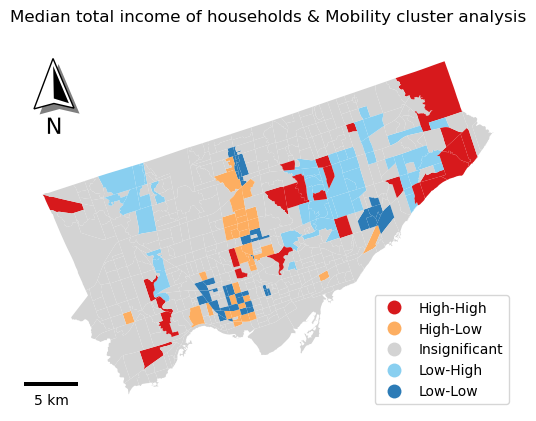

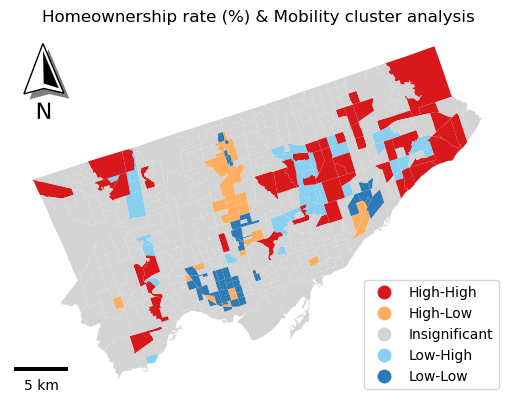

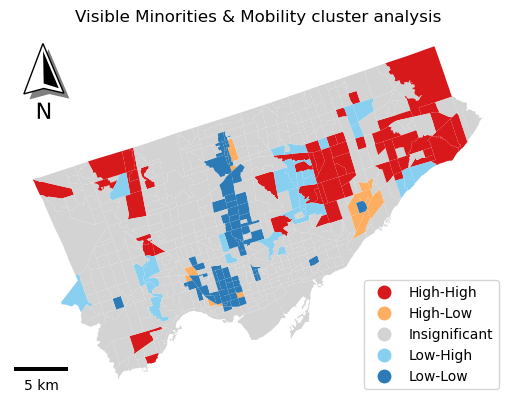

In [25]:
#plotting b
from plotter import plot_local_moran

f1, ax = plot_local_moran(ML_bv_income_mobility, all_data, 'Median total income of households & Mobility cluster analysis')
f2, ax = plot_local_moran(ML_bv_homeowners_mobility, all_data, 'Homeownership rate (%) & Mobility cluster analysis')
f3, ax = plot_local_moran(ML_bv_minority_mobility, all_data, 'Visible Minorities & Mobility cluster analysis')

In [26]:
f1.savefig('Median Income & Mobility Bivariate Local Moran.png')
f2.savefig('Homeownership rate & Mobility Bivariate Local Moran.png')
f3.savefig('Percentage of Visible Minorities & Mobility Bivariate Local Moran.png')